In [1]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines
import altair as alt
from vega_datasets import data



os.chdir("../")

SRC_PATH = ["src"]
for module_path in SRC_PATH:
    if module_path not in sys.path:
        sys.path.append(module_path)

from utils import *

# Experiment 1

## distil_roberta-base

In [2]:
detector = "distil_roberta-base"
training_method = "adapter"
model_code = "02_05_1424"
eval_acc_df_distil_adapter, degrad_loss_df_distil_adapter, training_loss_df_distil_adapter = create_df_from_training_logs(detector, training_method, model_code)

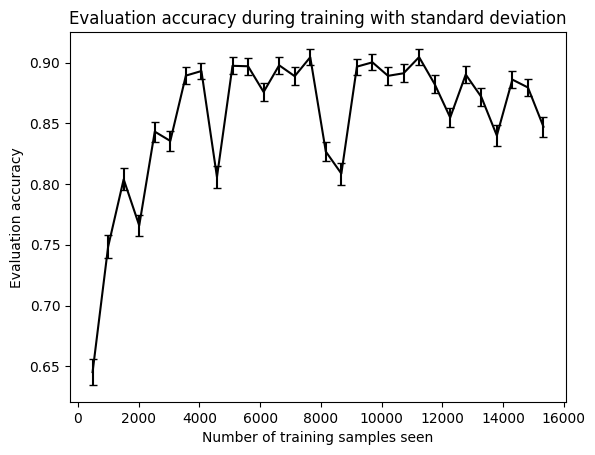

In [3]:
plot_eval_acc_vs_nb_samples(eval_acc_df_distil_adapter)

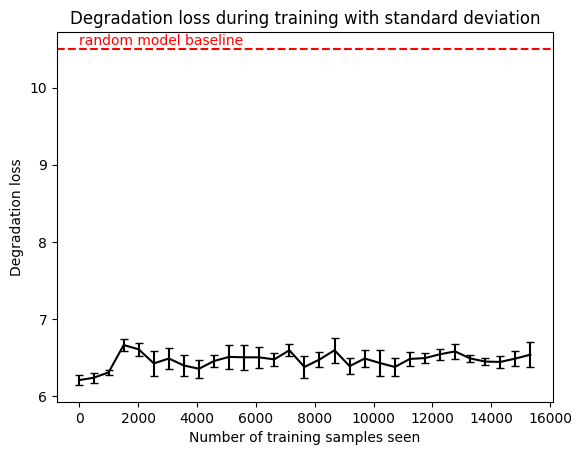

In [4]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_distil_adapter)

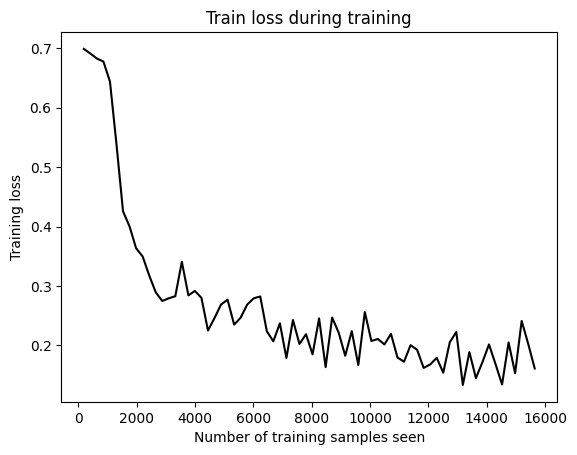

In [5]:
plot_training_loss_vs_nb_samples(training_loss_df_distil_adapter)

In [6]:
detector = "distil_roberta-base"
training_method = "full_finetuning"
model_code = "02_05_1431"
eval_acc_df_distil_full, degrad_loss_df_distil_full, training_loss_df_distil_full = create_df_from_training_logs(detector, training_method, model_code)

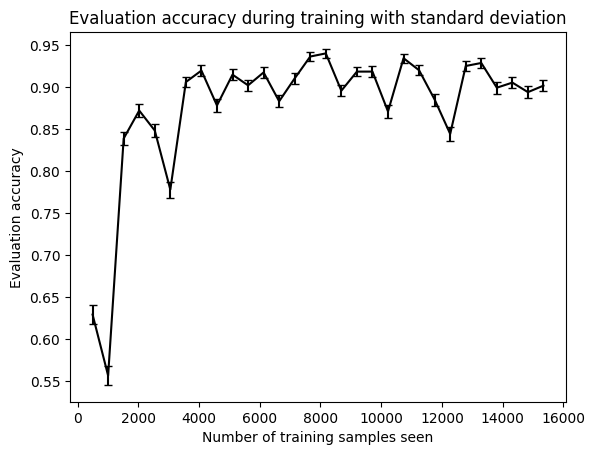

In [7]:
plot_eval_acc_vs_nb_samples(eval_acc_df_distil_full)

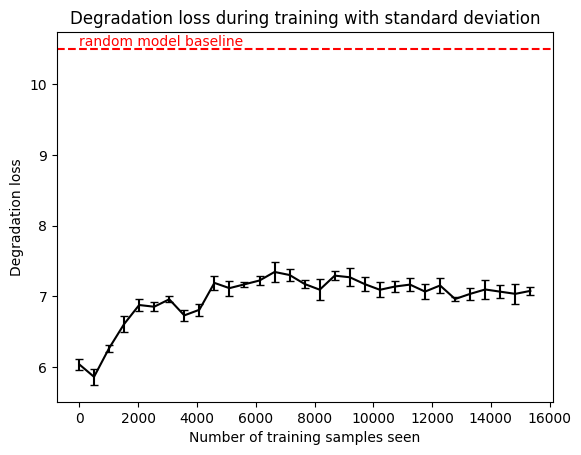

In [8]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_distil_full)

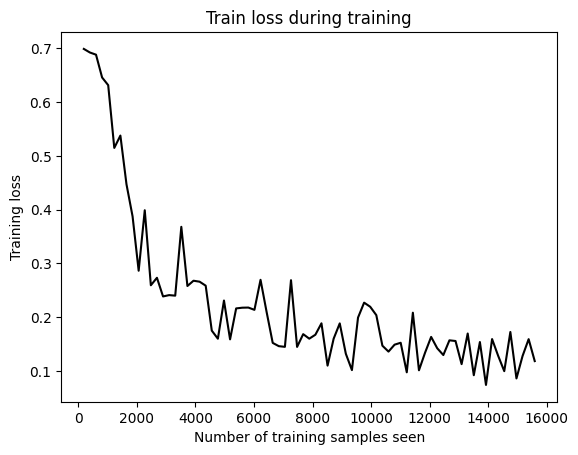

In [9]:
plot_training_loss_vs_nb_samples(training_loss_df_distil_full)

## roberta_large

In [10]:
detector = "roberta_large"
training_method = "adapter"
model_code = "30_04_1008"
eval_acc_df_large_adapter, degrad_loss_df_large_adapter, training_loss_df_large_adapter = create_df_from_training_logs(detector, training_method, model_code)

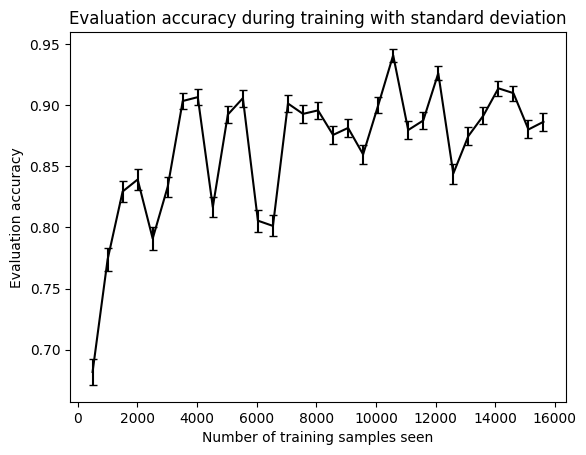

In [11]:
plot_eval_acc_vs_nb_samples(eval_acc_df_large_adapter)

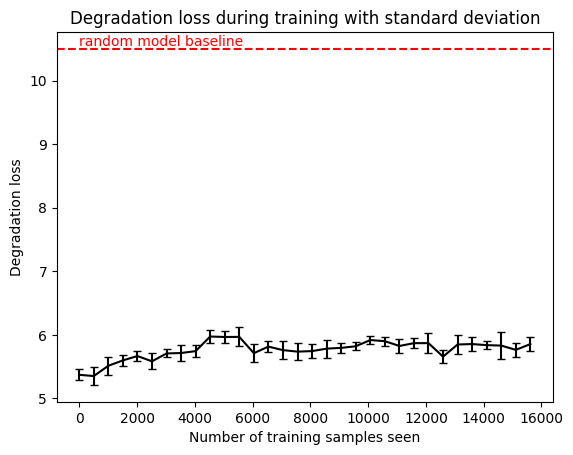

In [12]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_large_adapter)

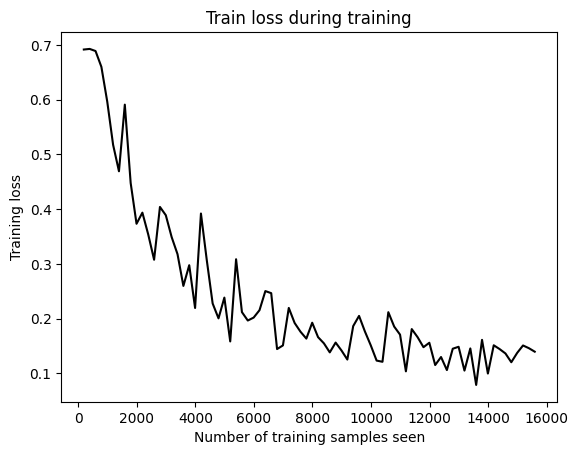

In [13]:
plot_training_loss_vs_nb_samples(training_loss_df_large_adapter)

In [14]:
detector = "roberta_large"
training_method = "full_finetuning"
model_code = "02_05_1419"
eval_acc_df_large_full, degrad_loss_df_large_full, training_loss_df_large_full = create_df_from_training_logs(detector, training_method, model_code)

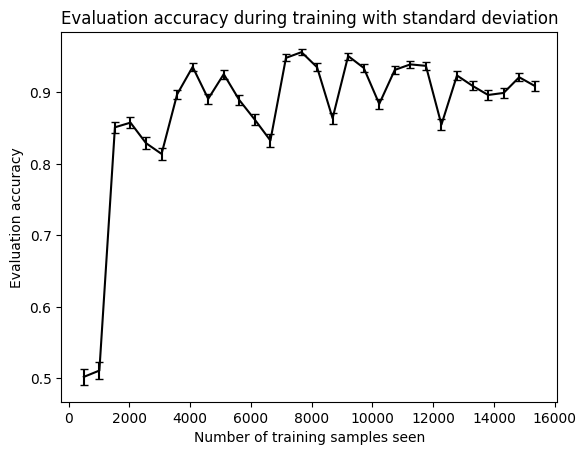

In [15]:
plot_eval_acc_vs_nb_samples(eval_acc_df_large_full)

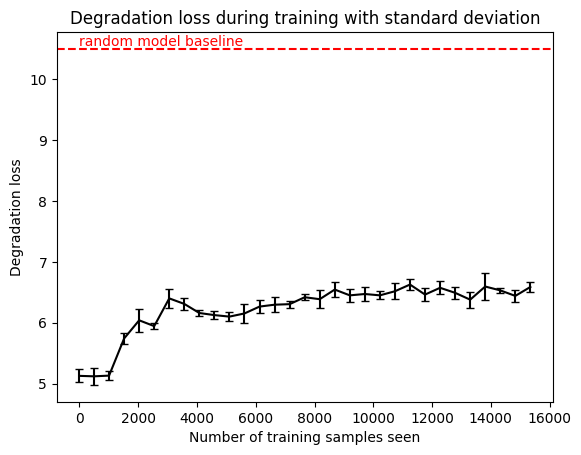

In [16]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df_large_full)

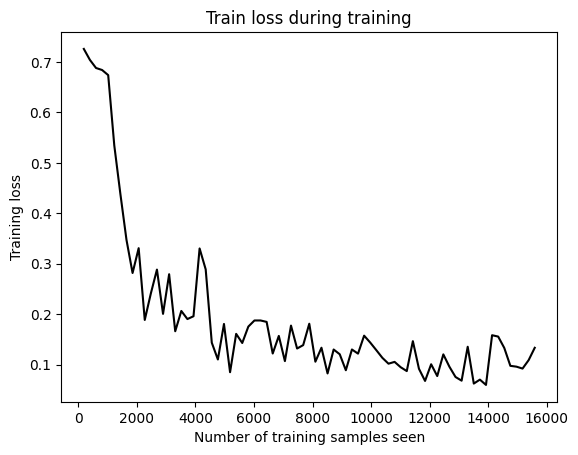

In [17]:
plot_training_loss_vs_nb_samples(training_loss_df_large_full)

## pannel plots

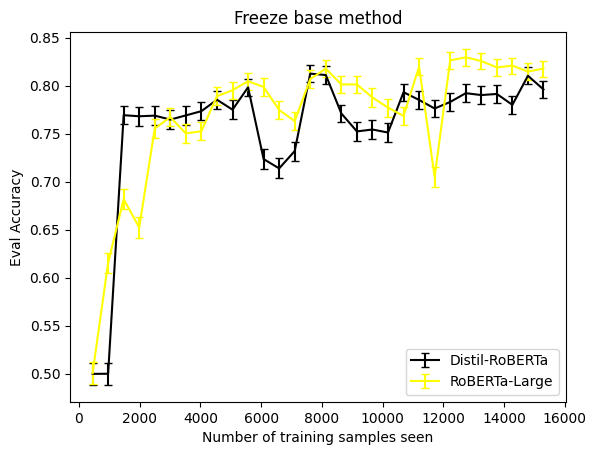

In [18]:
detector = "distil_roberta-base"
training_method = "freeze_base"
model_code = "30_04_0945"
eval_acc_df_distil_freeze_base, degrad_loss_df_distil_freeze_base, training_loss_df_distil_freeze_base = create_df_from_training_logs(detector, training_method, model_code)

detector = "roberta_large"
training_method = "freeze_base"
model_code = "30_04_0945"
eval_acc_df_large_freeze_base, degrad_loss_df_large_freeze_base, training_loss_df_large_freeze_base = create_df_from_training_logs(detector, training_method, model_code)

plot_compared_model_size_eval_acc(eval_acc_df_distil_freeze_base, eval_acc_df_large_freeze_base)

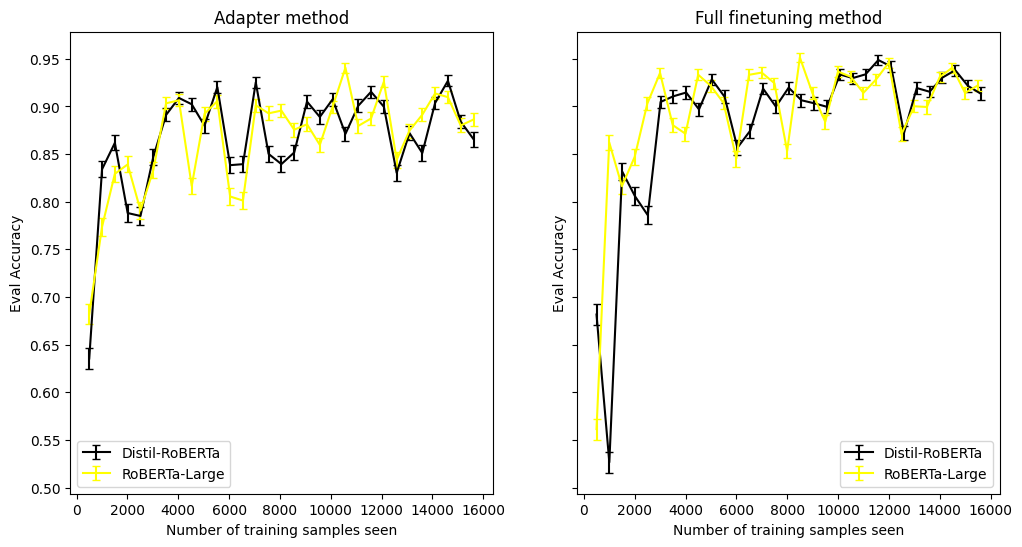

In [19]:
plot_panel_model_and_training_method_eval_acc(eval_acc_df_distil_adapter, eval_acc_df_distil_full, eval_acc_df_large_adapter, eval_acc_df_large_full)

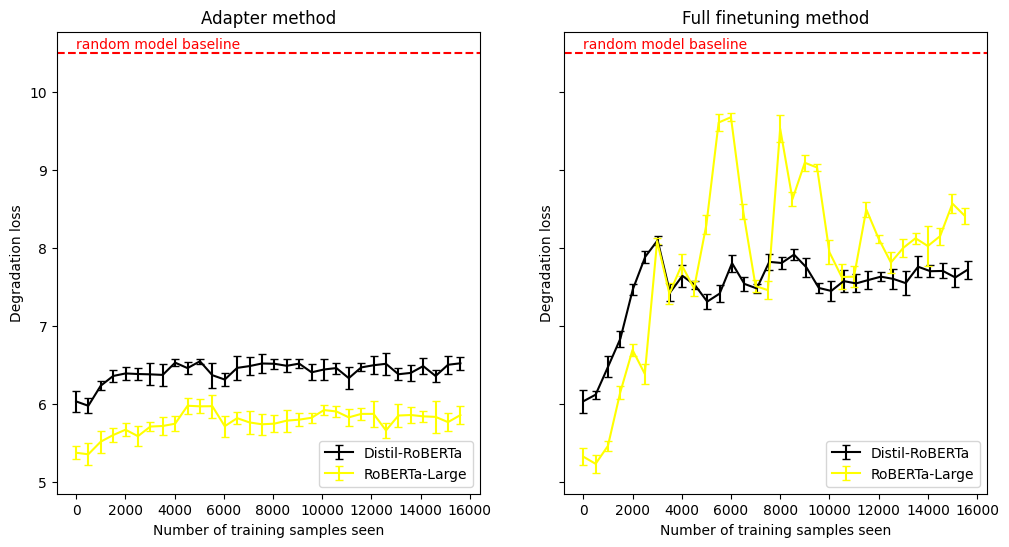

In [20]:
plot_panel_model_and_training_method_degrad(degrad_loss_df_distil_adapter, degrad_loss_df_distil_full, degrad_loss_df_large_adapter, degrad_loss_df_large_full)

# Experiment 2

## freeze base

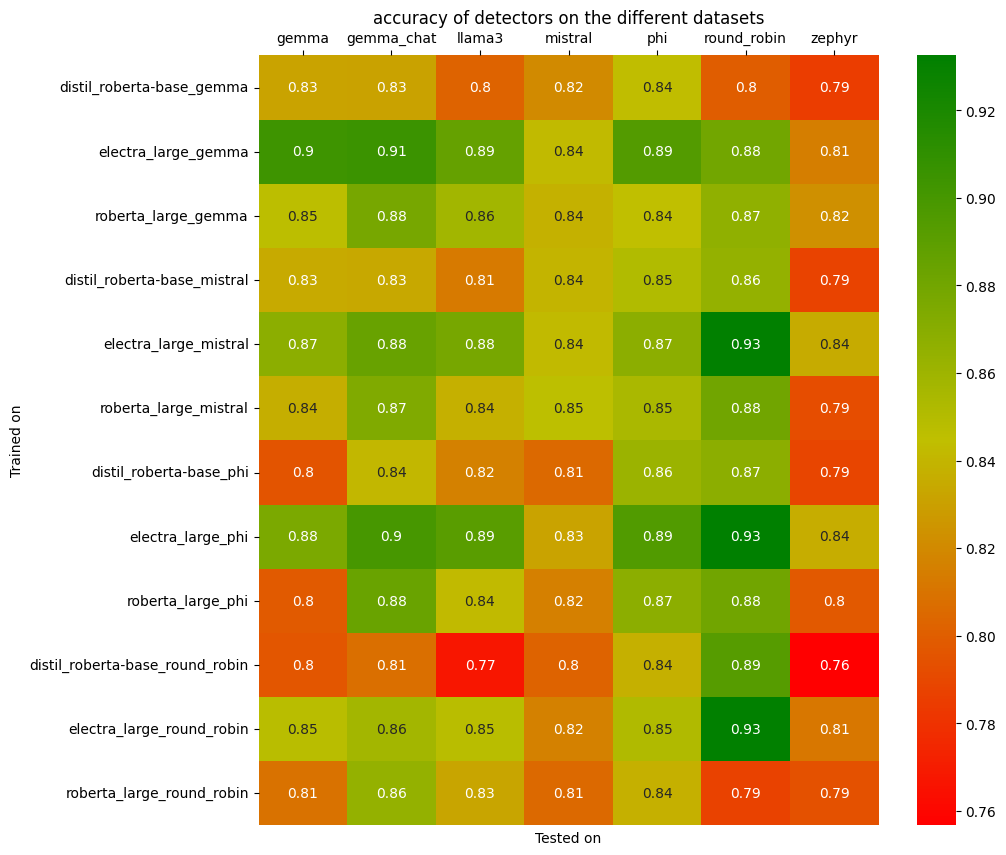

In [2]:
dataset_names = ["phi", "gemma", "mistral", "gemma_chat", "zephyr", "llama3", "round_robin"]

training_method = "freeze_base"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"03_05_1708": "phi", "03_05_1713": "gemma", "03_05_1716": "mistral", "03_05_1719": "round_robin"},
                    "roberta_large": {"03_05_1708": "phi", "03_05_1723": "gemma", "03_05_1736": "mistral", "03_05_1750": "round_robin"},
                    "electra_large": {"03_05_1708": "phi", "03_05_1721": "gemma", "03_05_1732": "mistral", "03_05_1742": "round_robin"}}


#dataset_names = ["phi", "gemma", "mistral", "round_robin", "gemma_chat", "zephyr"]


freeze_base_df = create_df_from_test_logs("freeze_base", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy", with_std=False)

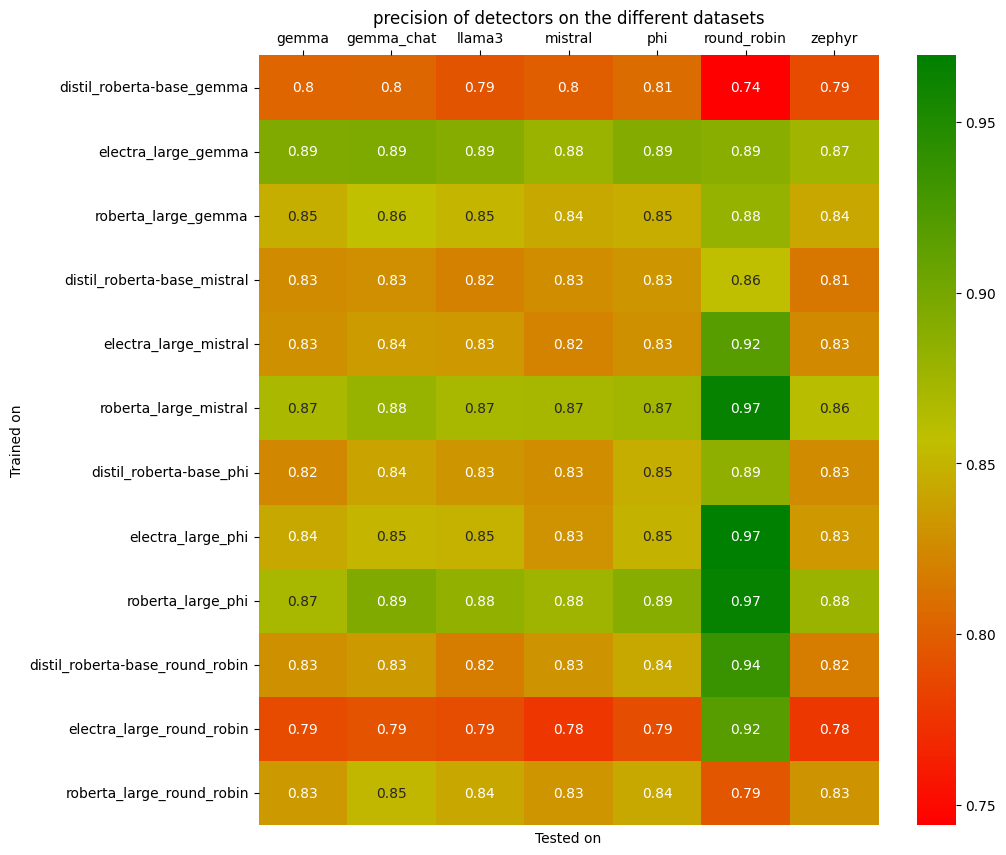

In [5]:
heatmap_from_df(freeze_base_df, "precision", with_std=False)

## Adapter

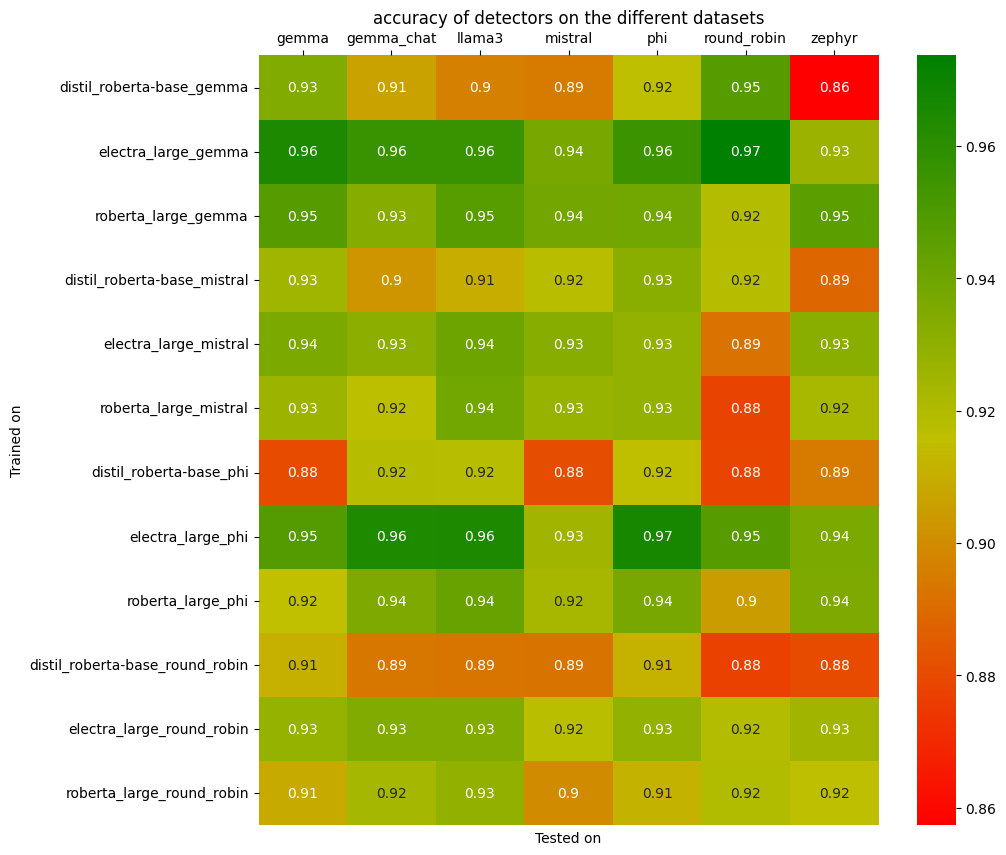

In [11]:
training_method = "adapter"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"03_05_1721": "phi", "03_05_1725": "gemma", "03_05_1729": "mistral", "03_05_1733": "round_robin"},
                    "roberta_large": {"03_05_1756": "phi", "03_05_1811": "gemma", "03_05_1825": "mistral", "03_05_1839": "round_robin"},
                    "electra_large": {"03_05_1749": "phi", "03_05_1805": "gemma", "03_05_1821": "mistral", "03_05_1836": "round_robin"}}


freeze_base_df = create_df_from_test_logs("adapter", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

In [13]:
freeze_base_df = freeze_base_df.sort_values(by="trained_on_dataset")
dataset_order = ["phi", "gemma", "mistral", "round_robin", "gemma_chat", "zephyr", "llama3"]
freeze_base_df = freeze_base_df.set_index("dataset").loc[dataset_order].reset_index()
detector_name_to_short_name = {"distil_roberta-base": "distil", "roberta_large": "roberta", "electra_large": "electra"}
freeze_base_df["detector_short_name"] = freeze_base_df["base_detector"].apply(lambda x: detector_name_to_short_name[x])
# set detector_name as f"{detector_short_name}_{trained_on_dataset}"
freeze_base_df["detector_name"] = freeze_base_df["detector_short_name"] + "_" + freeze_base_df["trained_on_dataset"]
freeze_base_df.head()

,dataset,accuracy,precision,recall,f1_score,fp_rate,std_accuracy,std_precision,std_recall,std_f1_score,std_fp_rate,TP,TN,FP,FN,base_detector,trained_on_dataset,detector,detector_short_name,detector_name
0,phi,0.916332,0.940868,0.888621,0.913959,0.055913,0.006097,0.007869,0.009795,0.006657,0.007291,885.750,939.584,55.658,111.008,distil_roberta-base,gemma,distil_roberta-base_gemma,distil,distil_gemma
1,phi,0.955478,0.948298,0.963550,0.955842,0.052604,0.004617,0.007087,0.005923,0.004715,0.007143,960.430,942.882,52.360,36.328,electra_large,gemma,electra_large_gemma,electra,electra_gemma
2,phi,0.938972,0.918460,0.963582,0.940454,0.085685,0.005278,0.008275,0.005891,0.005308,0.008769,960.461,909.972,85.270,36.297,roberta_large,gemma,roberta_large_gemma,roberta,roberta_gemma
3,phi,0.931847,0.899921,0.971866,0.934481,0.108234,0.005654,0.009221,0.005210,0.005684,0.009777,968.721,887.518,107.724,28.037,distil_roberta-base,mistral,distil_roberta-base_mistral,distil,distil_mistral
4,phi,0.928893,0.940563,0.915769,0.927967,0.057973,0.005717,0.007372,0.008868,0.005965,0.007296,912.801,937.554,57.688,83.957,roberta_large,mistral,roberta_large_mistral,roberta,roberta_mistral


In [14]:
heatmap = alt.Chart(freeze_base_df).mark_rect().encode(
    alt.X('dataset:N', sort=None, title="Dataset used for testing"),
    alt.Y('detector_short_name:N', sort=None, title="Detector"),
    alt.Color('accuracy:Q').scale(scheme='redyellowgreen'),
    #alt.Row("trained_on_dataset:N", title="Dataset used for training"),
).properties(
    width=200,
    height=200
)

heatmap_text = alt.Chart(freeze_base_df).mark_text(baseline='middle').encode(
    alt.X('dataset:N', sort=None, title="Dataset used for testing"),
    alt.Y('detector_short_name:N', sort=None, title="Detector"),
    text='accuracy:Q',
    color=alt.condition(
        alt.datum.accuracy > 0.5,
        alt.value('black'),
        alt.value('white')
    )
).properties(
    width=200,
    height=200
)

alt.layer(heatmap, heatmap_text).facet(
    column=alt.Column("trained_on_dataset:N", title="Dataset used for training")
).configure(
    numberFormat='0.2f'
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)

alt.FacetChart(...)

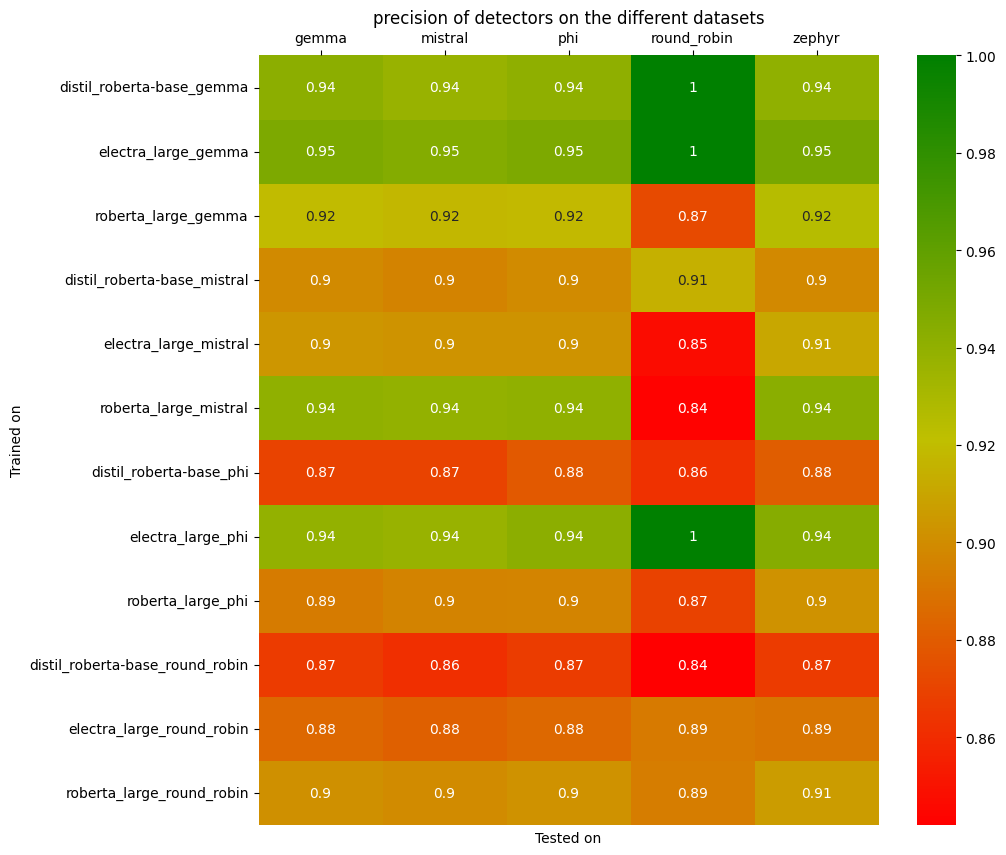

In [9]:
heatmap_from_df(freeze_base_df, "precision")

## full_finetuning

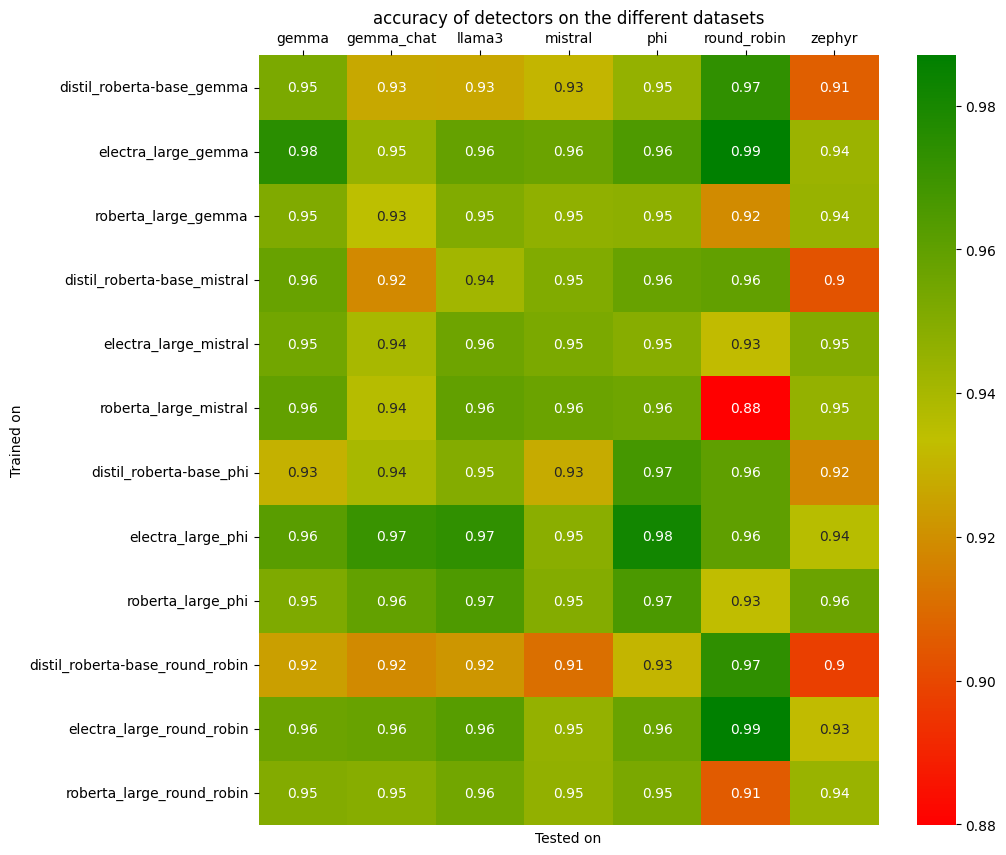

In [2]:
dataset_names = ["phi", "gemma", "mistral", "gemma_chat", "zephyr", "llama3", "round_robin"]
training_method = "full_finetuning"
trained_on_models = {"distil_roberta-base": {"03_05_1735": "phi", "03_05_1741": "gemma", "03_05_1748": "mistral", "03_05_1754": "round_robin"},
                    "roberta_large": {"03_05_1845": "phi", "03_05_1910": "gemma", "03_05_1935": "mistral", "03_05_2001": "round_robin"},
                    "electra_large": {"03_05_1842": "phi", "03_05_1909": "gemma", "03_05_1935": "mistral", "03_05_2001": "round_robin"}}


freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

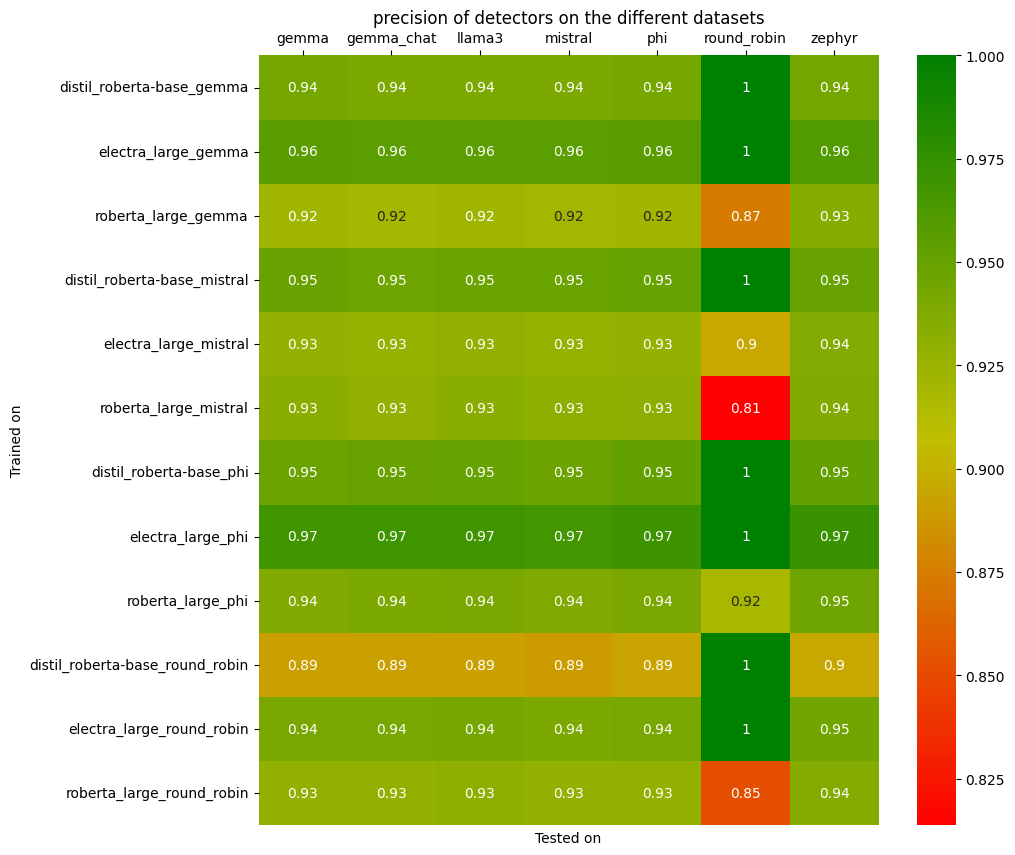

In [15]:
heatmap_from_df(freeze_base_df, "precision")

In [22]:
freeze_base_df

,accuracy,precision,recall,f1_score,fp_rate,std_accuracy,std_precision,std_recall,std_f1_score,std_fp_rate,TP,TN,FP,FN,base_detector,trained_on_dataset,detector,dataset
8,0.952513,0.942543,0.963793,0.953027,0.058784,0.004798,0.007323,0.006022,0.004851,0.007605,953.327,930.743,58.121,35.809,distil_roberta-base,gemma,distil_roberta-base_gemma,gemma
10,0.926972,0.940249,0.912006,0.925877,0.058048,0.005680,0.007639,0.008873,0.006030,0.007442,909.057,937.471,57.771,87.701,distil_roberta-base,gemma,distil_roberta-base_gemma,gemma_chat
12,0.926332,0.940168,0.910734,0.925182,0.058048,0.005888,0.007663,0.009068,0.006200,0.007442,907.782,937.471,57.771,88.976,distil_roberta-base,gemma,distil_roberta-base_gemma,llama3
9,0.930649,0.939952,0.919849,0.929759,0.058592,0.005681,0.007632,0.008648,0.006003,0.007459,905.654,929.585,57.856,78.905,distil_roberta-base,gemma,distil_roberta-base_gemma,mistral
7,0.945348,0.942504,0.948649,0.945541,0.057955,0.005259,0.007493,0.007078,0.005370,0.007521,945.572,937.561,57.681,51.186,distil_roberta-base,gemma,distil_roberta-base_gemma,phi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.955090,0.930133,0.984166,0.956368,0.074035,0.004432,0.007474,0.004028,0.004435,0.007869,980.977,921.562,73.680,15.781,roberta_large,round_robin,roberta_large_round_robin,llama3
51,0.946003,0.928109,0.966732,0.947003,0.074663,0.004911,0.007942,0.005414,0.004944,0.008221,951.801,913.716,73.725,32.758,roberta_large,round_robin,roberta_large_round_robin,mistral
49,0.953032,0.929037,0.981073,0.954327,0.075061,0.004568,0.007543,0.004232,0.004533,0.008043,977.893,920.547,74.695,18.865,roberta_large,round_robin,roberta_large_round_robin,phi
55,0.905560,0.851735,0.972723,0.907127,0.156746,0.033978,0.056045,0.027478,0.035394,0.059295,35.079,32.838,6.108,0.975,roberta_large,round_robin,roberta_large_round_robin,round_robin


In [23]:
# best detector

# change type of accuracy, precision, recall, f1-score to float
freeze_base_df["accuracy"] = freeze_base_df["accuracy"].astype(float)
freeze_base_df["precision"] = freeze_base_df["precision"].astype(float)
freeze_base_df["recall"] = freeze_base_df["recall"].astype(float)
freeze_base_df["f1_score"] = freeze_base_df["f1_score"].astype(float)

freeze_base_df_metrics = freeze_base_df[["accuracy", "precision", "recall", "f1_score", "detector"]]

# group by detector and compute the mean accuracy per detector
freeze_base_df_metrics.groupby(["detector"]).mean().reset_index().sort_values(by="accuracy", ascending=False)

,detector,accuracy,precision,recall,f1_score
6,electra_large_phi,0.961782,0.973659,0.949037,0.960694
4,electra_large_gemma,0.961628,0.963032,0.960107,0.961369
7,electra_large_round_robin,0.957071,0.950538,0.964544,0.957243
10,roberta_large_phi,0.954543,0.937130,0.973597,0.954834
5,electra_large_mistral,0.947887,0.924454,0.974840,0.948762
11,roberta_large_round_robin,0.943282,0.919024,0.972170,0.944423
8,roberta_large_gemma,0.941932,0.916227,0.972282,0.943109
9,roberta_large_mistral,0.941863,0.915510,0.974700,0.943407
2,distil_roberta-base_phi,0.941789,0.956639,0.925422,0.940294
1,distil_roberta-base_mistral,0.941352,0.955859,0.925363,0.939687


In [24]:
# base detector

freeze_base_df_metrics = freeze_base_df[["accuracy", "precision", "recall", "f1_score", "base_detector"]]

# group by detector and compute the mean accuracy per detector
freeze_base_df_metrics.groupby(["base_detector"]).mean().reset_index().sort_values(by="accuracy", ascending=False)

,base_detector,accuracy,precision,recall,f1_score
1,electra_large,0.957092,0.952921,0.962132,0.957017
2,roberta_large,0.945405,0.921973,0.973187,0.946443
0,distil_roberta-base,0.936492,0.942474,0.930817,0.935815


In [27]:
# best dataset to train on

freeze_base_df_metrics= freeze_base_df[["accuracy", "precision", "recall", "f1_score", "trained_on_dataset"]].copy()
freeze_base_df_metrics.groupby(["trained_on_dataset"]).mean().reset_index().sort_values(by="accuracy", ascending=False)

,trained_on_dataset,accuracy,precision,recall,f1_score
2,phi,0.952705,0.955809,0.949352,0.951940
0,gemma,0.946979,0.943034,0.951946,0.946860
1,mistral,0.943701,0.931941,0.958301,0.943952
3,round_robin,0.941935,0.925705,0.961915,0.942947


In [21]:
# best detectors on chat models
chat_models = ["gemma_chat", "zephyr", "llama3"]
freeze_base_df_metrics_chat = freeze_base_df[["accuracy", "precision", "recall", "f1_score", "detector", "dataset"]].copy()
freeze_base_df_metrics_chat = freeze_base_df_metrics_chat[freeze_base_df_metrics_chat["dataset"].isin(chat_models)]
freeze_base_df_metrics_chat = freeze_base_df_metrics_chat[["accuracy", "precision", "recall", "f1_score", "detector"]]
freeze_base_df_metrics_chat.groupby(["detector"]).mean().reset_index().sort_values(by="accuracy", ascending=False)

,detector,accuracy,precision,recall,f1_score
10,roberta_large_phi,0.960365,0.941962,0.981262,0.961156
6,electra_large_phi,0.960018,0.970159,0.949317,0.959208
7,electra_large_round_robin,0.950937,0.943454,0.959467,0.951116
11,roberta_large_round_robin,0.949373,0.931687,0.969955,0.950355
4,electra_large_gemma,0.949170,0.957301,0.940354,0.948654
5,electra_large_mistral,0.948881,0.930841,0.969896,0.949890
9,roberta_large_mistral,0.947042,0.933182,0.963109,0.947779
8,roberta_large_gemma,0.943025,0.925633,0.963602,0.944131
2,distil_roberta-base_phi,0.935869,0.950208,0.920031,0.934594
1,distil_roberta-base_mistral,0.921012,0.947841,0.891160,0.918248


In [28]:
# dataset where detectors struggle the most

freeze_base_df_metrics = freeze_base_df[["accuracy", "precision", "recall", "f1_score", "dataset"]].copy()
freeze_base_df_metrics.groupby(["dataset"]).mean().reset_index().sort_values(by="accuracy", ascending=True)

,dataset,accuracy,precision,recall,f1_score
6,zephyr,0.931474,0.942404,0.919633,0.930277
1,gemma_chat,0.941336,0.936464,0.947515,0.941615
3,mistral,0.943558,0.935949,0.952718,0.943913
5,round_robin,0.947610,0.945933,0.951881,0.946317
2,llama3,0.951750,0.937745,0.968335,0.952491
0,gemma,0.952164,0.937208,0.969822,0.952960
4,phi,0.956415,0.938155,0.977747,0.957402


# With Detect GPT and roberta_open_ai


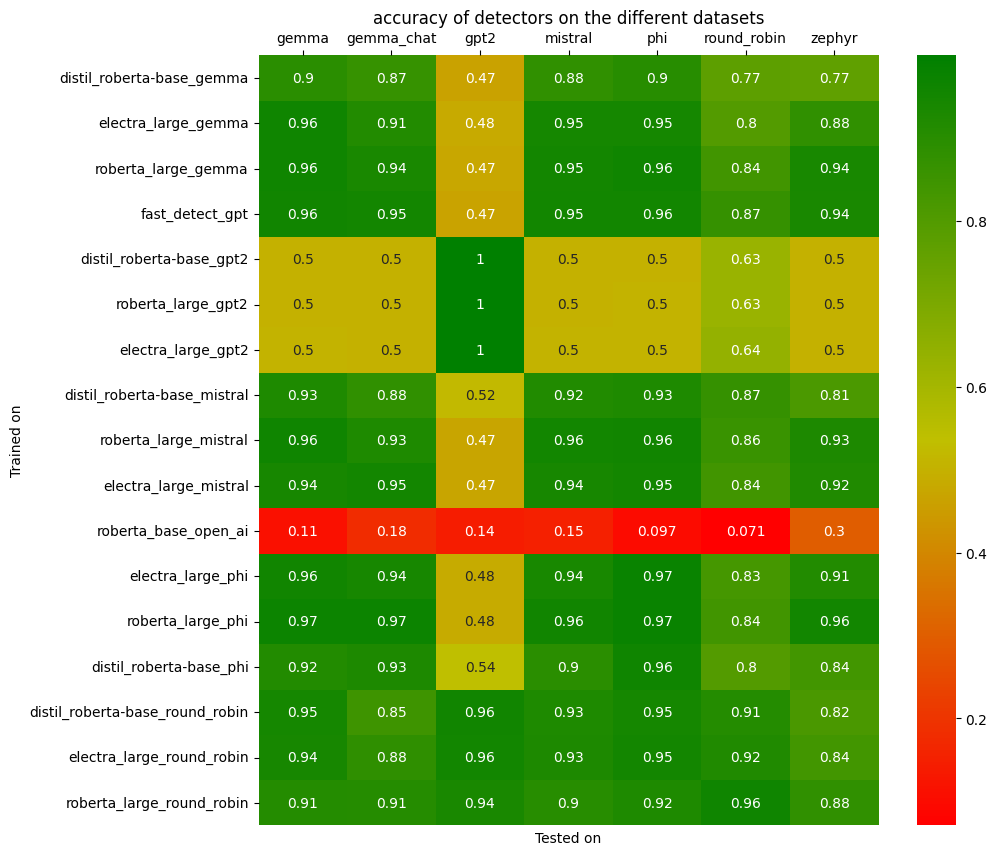

In [5]:
training_method = "full_finetuning"
trained_on_models = {"distil_roberta-base": {"11_04_1532":"gpt2", "11_04_1553": "phi", "11_04_1558": "gemma", "15_04_1314": "mistral", "15_04_1318": "round_robin"},
                    "roberta_large": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"},
                    "electra_large": {"10_04_2114":"gpt2", "10_04_2125": "phi", "10_04_2137": "gemma", "15_04_1344": "mistral", "15_04_1356": "round_robin"}}


fast_detect_gpt_results = {"fast_detect_gpt": {"17_04_1515": "gpt2", "17_04_1521" : "phi", "17_04_1527" : "gemma", "17_04_1534" : "mistral", "17_04_1540" : "round_robin",
                           "17_04_1544": "gemma_chat", "17_04_1550" : "zephyr"}}
roberta_open_ai_results = {"roberta_base_open_ai": {"18_04_1622": "gpt2", "18_04_1623" : "phi", "18_04_1624" : "gemma", "18_04_1715" : "mistral", "18_04_1625" : "round_robin",
                           "18_04_1634": "gemma_chat", "18_04_1636" : "zephyr"}}
freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)

freeze_base_df = add_test_logs_to_results_df(freeze_base_df, fast_detect_gpt_results)
freeze_base_df = add_test_logs_to_results_df(freeze_base_df, roberta_open_ai_results)

heatmap_from_df(freeze_base_df, "accuracy")

# Remove special chars

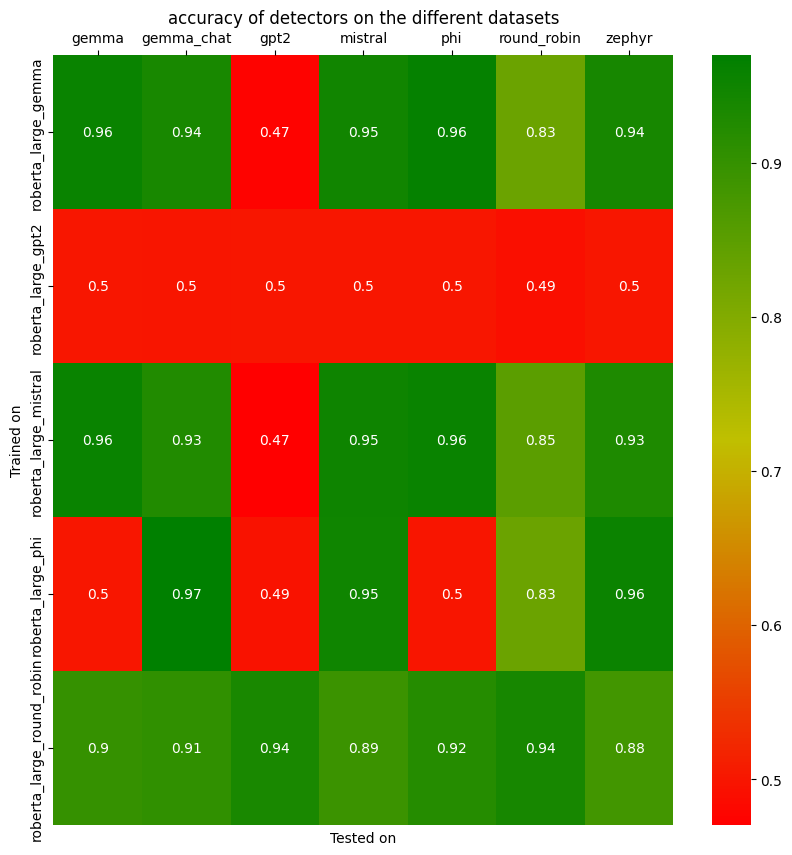

In [10]:
dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr", "round_robin"]
suffix = "normalized"
training_method = "full_finetuning"
trained_on_models = {"roberta_large": {"11_04_1843":"gpt2", "11_04_1902": "phi", "11_04_1921": "gemma", "15_04_1349": "mistral", "15_04_1403": "round_robin"}}

freeze_base_df = create_df_from_test_logs_modified("full_finetuning", trained_on_models, dataset_names, suffix)
heatmap_from_df(freeze_base_df, "accuracy")

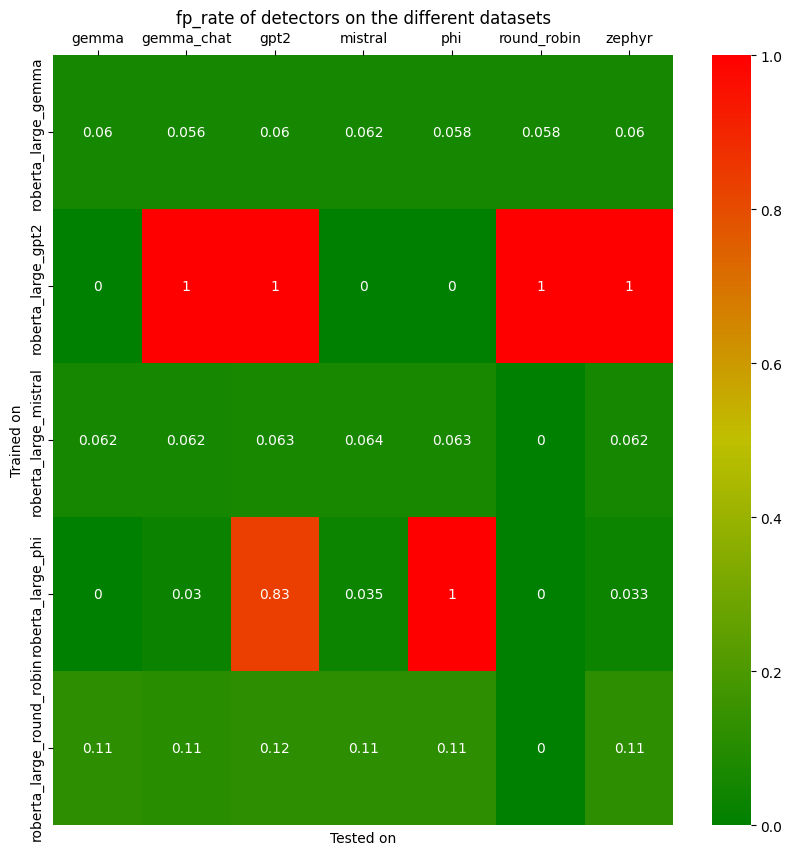

In [11]:
heatmap_from_df(freeze_base_df, "fp_rate")

# Special apostrophes

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/1024 [00:00<?, ?it/s]

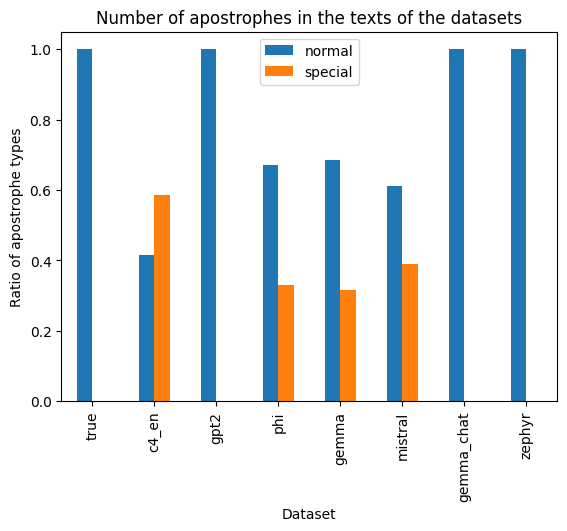

In [8]:
def count_apostrophes_absolute(texts):
    count_apostrophe_type_1 = 0
    count_apostrophe_type_2 = 0

    for text in texts:
        count_apostrophe_type_1 += text.count("'")
        count_apostrophe_type_2 += text.count("’")

    return count_apostrophe_type_1, count_apostrophe_type_2


def count_apostrophes_relative(texts):
    count_apostrophe_type_1 = 0
    count_apostrophe_type_2 = 0

    for text in texts:
        count_apostrophe_type_1 += text.count("'")
        count_apostrophe_type_2 += text.count("’")

    total_apostrophes = count_apostrophe_type_1 + count_apostrophe_type_2

    relative_count_apostrophe_type_1 = count_apostrophe_type_1 / total_apostrophes
    relative_count_apostrophe_type_2 = count_apostrophe_type_2 / total_apostrophes

    return relative_count_apostrophe_type_1, relative_count_apostrophe_type_2


count_apostrophes_dict = {}
true_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_mistral_10k_train.json")
true_texts_df = true_train_dataset_df[true_train_dataset_df["label"] == 0]
count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_relative(true_texts_df["text"].apply(lambda x: x[0]))
count_apostrophes_dict["true"] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}

en_dataset = load_dataset("allenai/c4", "en", streaming=True)
sample_size = 100000
en_dataset_sample = en_dataset["train"].shuffle(seed=42).take(sample_size)
en_dataset_sample_df = pd.DataFrame(en_dataset_sample)
count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_relative(en_dataset_sample_df["text"])
count_apostrophes_dict["c4_en"] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}



# load the datasets
datasets = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]

for dataset in datasets:
    experiment_name = f"{dataset}_10k"
    fake_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_{experiment_name}_train.json")

    fake_texts_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 1]
    count_apostrophe_type_1, count_apostrophe_type_2 = count_apostrophes_relative(fake_texts_df["text"].apply(lambda x: x[0]))
    count_apostrophes_dict[dataset] = {"normal": count_apostrophe_type_1, "special": count_apostrophe_type_2}


# plot the results with a bar plot per dataset
count_apostrophes_df = pd.DataFrame(count_apostrophes_dict).T
count_apostrophes_df.plot(kind="bar")
plt.title("Number of apostrophes in the texts of the datasets")
plt.xlabel("Dataset")
plt.ylabel("Ratio of apostrophe types")
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


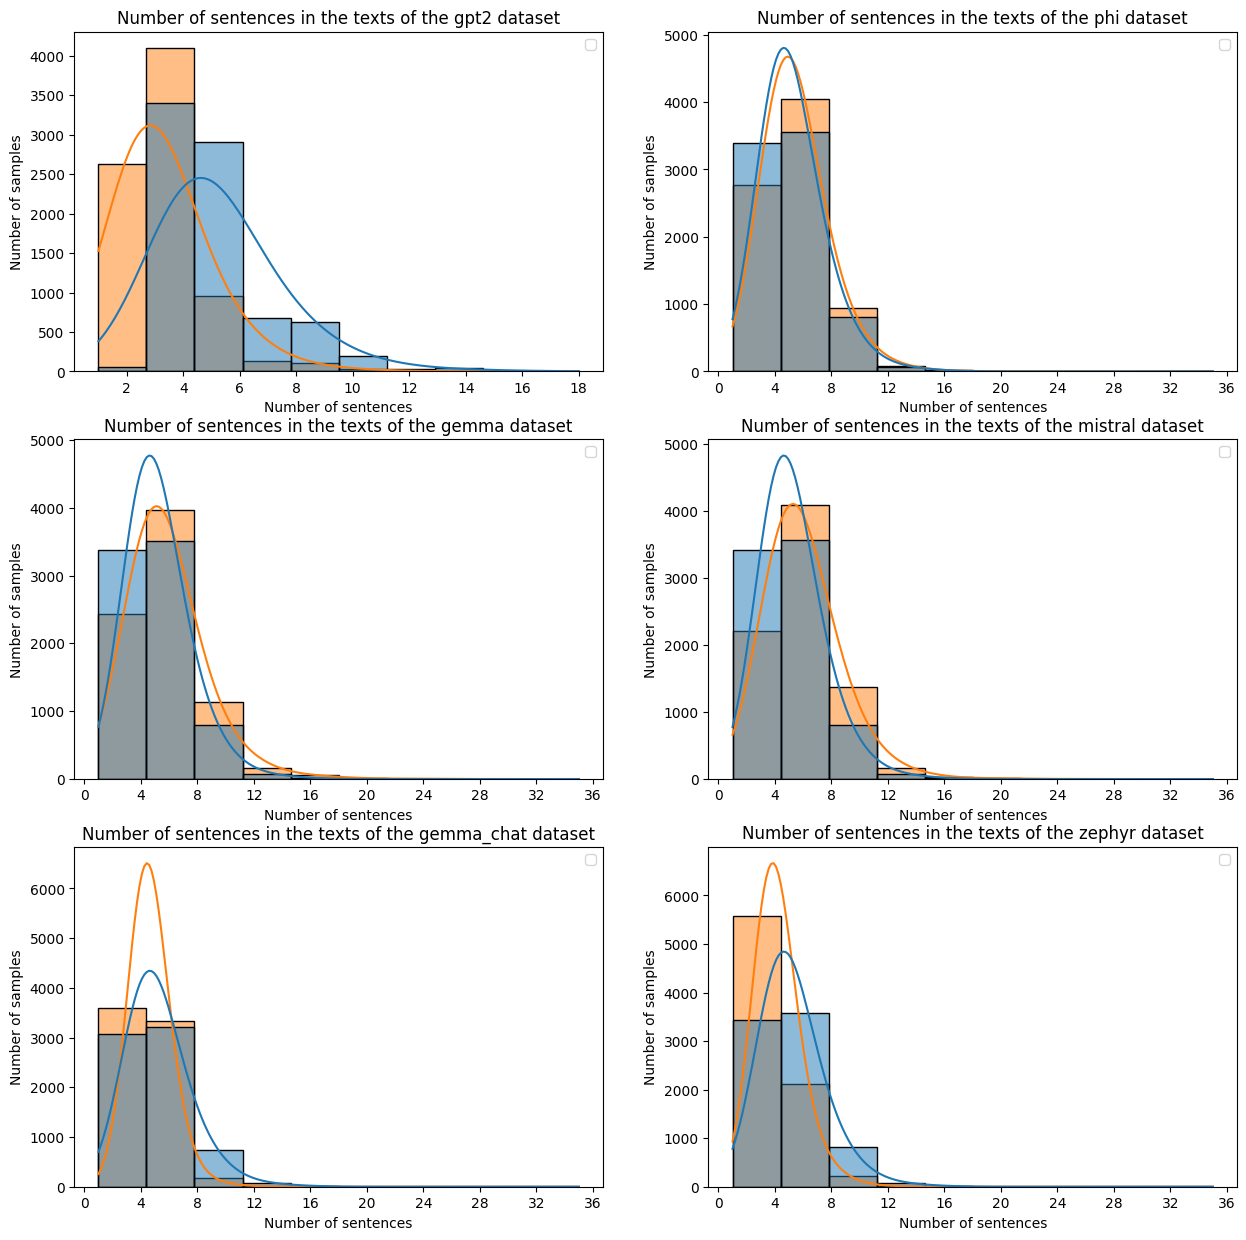

In [35]:
def count_nb_sentences(texts):
    # returns a dict with key number of sentence and value number of samples with that length
    nb_sentence_dict = {}

    for text in texts:
        nb_sentences = len(text.split("."))
        if nb_sentences in nb_sentence_dict:
            nb_sentence_dict[nb_sentences] += 1
        else:
            nb_sentence_dict[nb_sentences] = 1

    return nb_sentence_dict


# load the datasets
datasets = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]
nb_setence_dict_dataset = {}

for dataset in datasets:
    experiment_name = f"{dataset}_10k"
    fake_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_{experiment_name}_train.json")

    true_text_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 0]
    fake_texts_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 1]
    nb_sentence_dict_true = count_nb_sentences(true_text_df["text"].apply(lambda x: x[0]))
    nb_sentence_dict_fake = count_nb_sentences(fake_texts_df["text"].apply(lambda x: x[0]))
    nb_setence_dict_dataset[dataset] = {"true": nb_sentence_dict_true, "fake": nb_sentence_dict_fake}

# plot the results with two histograms per dataset, one for the true and one for the fake samples
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, dataset in enumerate(datasets):
    ax = axs[i // 2, i % 2]
    nb_sentence_dict_true = nb_setence_dict_dataset[dataset]["true"]
    nb_sentence_dict_fake = nb_setence_dict_dataset[dataset]["fake"]

    # put nb of sentence in x axis and number of samples in y axis
    #sns.histplot(nb_sentence_dict_true, x=list(nb_sentence_dict_true.keys()), y=list(nb_sentence_dict_true.values()), ax=ax, color="blue", label="true", kde=True)
    #sns.histplot(nb_sentence_dict_fake, x=list(nb_sentence_dict_fake.keys()), y=list(nb_sentence_dict_fake.values()), ax=ax, color="red", label="fake", kde=True)
    #sns.barplot(x=list(nb_sentence_dict_true.keys()), y=list(nb_sentence_dict_true.values()), ax=ax, color="blue", label="true")
    #sns.barplot(x=list(nb_sentence_dict_fake.keys()), y=list(nb_sentence_dict_fake.values()), ax=ax, color="orange", label="fake")
    #sns.histplot(nb_sentence_dict_true, x=list(nb_sentence_dict_true.keys()), weights=list(nb_sentence_dict_true.values()), ax=ax, color="blue", label="true", kde=True, bins=10)
    #sns.histplot(nb_sentence_dict_fake, x=list(nb_sentence_dict_fake.keys()), weights=list(nb_sentence_dict_fake.values()), ax=ax, color="red", label="fake", kde=True, bins=10)

    # create a dataframe with the number of sentences and the number of samples and column indicating if the sample is true or fake
    nb_sentence_df_true = pd.DataFrame({"nb_sentences": list(nb_sentence_dict_true.keys()), "nb_samples": list(nb_sentence_dict_true.values()), "label": "true"})
    nb_sentence_df_fake = pd.DataFrame({"nb_sentences": list(nb_sentence_dict_fake.keys()), "nb_samples": list(nb_sentence_dict_fake.values()), "label": "fake"})
    nb_sentence_df = pd.concat([nb_sentence_df_true, nb_sentence_df_fake])

    sns.histplot(data=nb_sentence_df, x="nb_sentences", weights="nb_samples", hue="label", ax=ax, bins=10, kde=True)

    # change x axis to integers
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    ax.set_title(f"Number of sentences in the texts of the {dataset} dataset")
    ax.set_xlabel("Number of sentences")
    ax.set_ylabel("Number of samples")
    ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


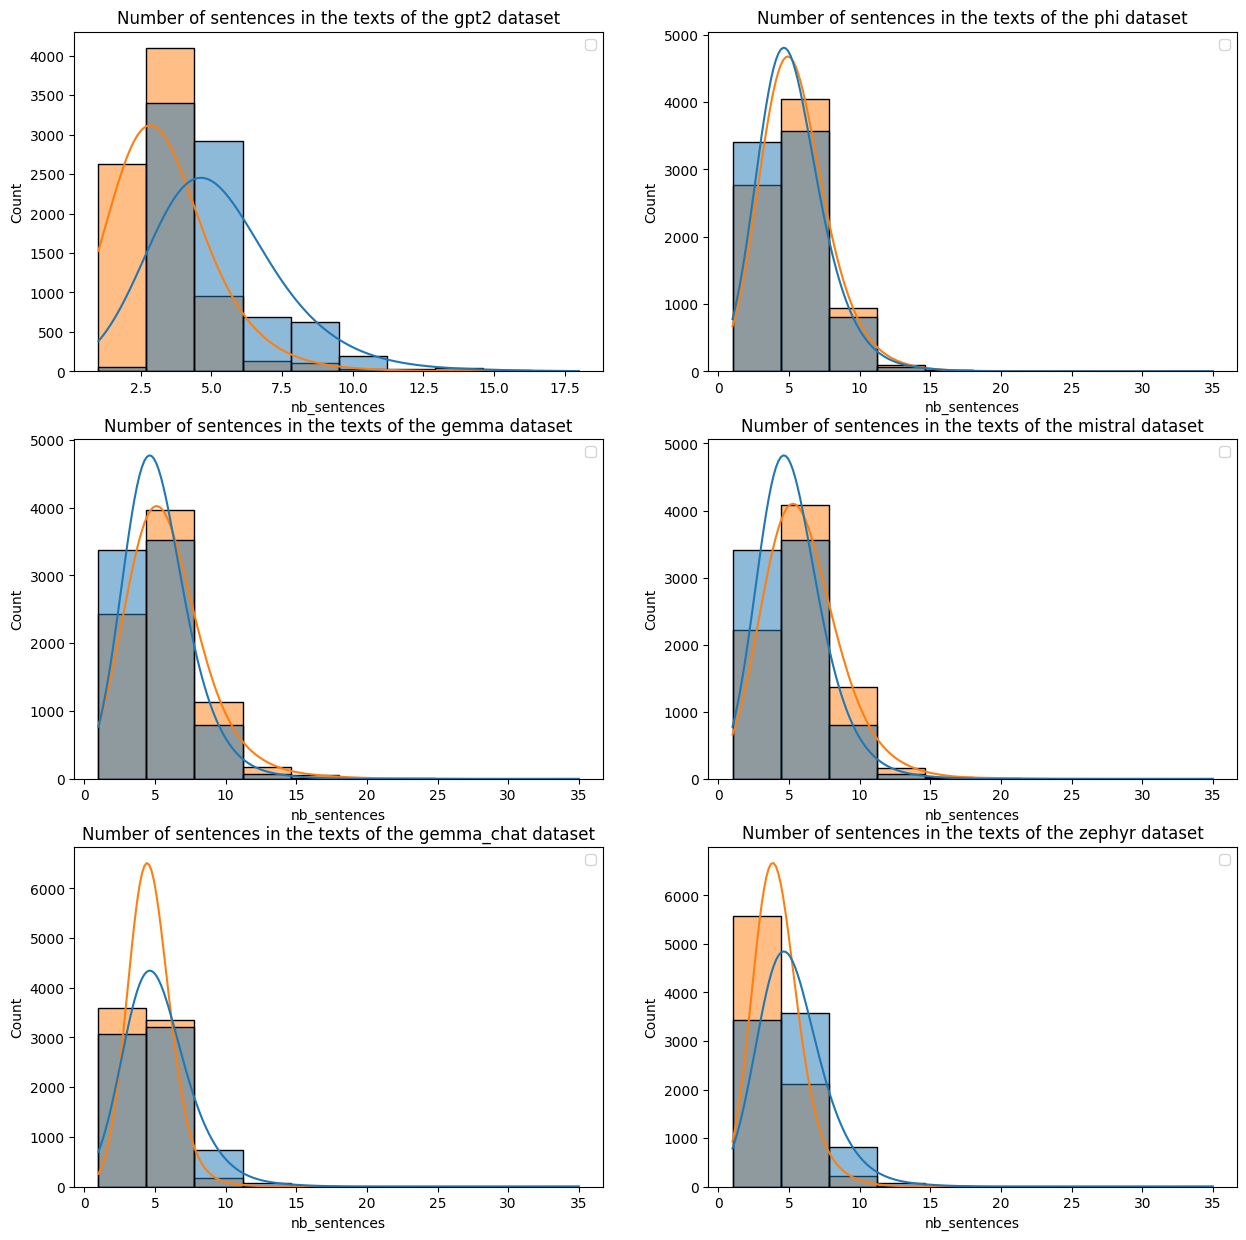

In [37]:
def sentence_len(texts):
    # returns a dict with key number of sentence and value number of samples with that length
    nb_sentence_dict = {}

    for text in texts:
        sentences = text.split(".")
        for sentence in sentences:
            sentence_len = len(sentence.split())
            if sentence_len in nb_sentence_dict:
                nb_sentence_dict[sentence_len] += 1
            else:
                nb_sentence_dict[sentence_len] = 1

    return nb_sentence_dict


# load the datasets
datasets = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]
nb_setence_dict_dataset = {}

for dataset in datasets:
    experiment_name = f"{dataset}_10k"
    fake_train_dataset_df = pd.read_json(f"fake_true_datasets/fake_true_dataset_{experiment_name}_train.json")

    true_text_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 0]
    fake_texts_df = fake_train_dataset_df[fake_train_dataset_df["label"] == 1]
    nb_sentence_dict_true = count_nb_sentences(true_text_df["text"].apply(lambda x: x[0]))
    nb_sentence_dict_fake = count_nb_sentences(fake_texts_df["text"].apply(lambda x: x[0]))
    nb_setence_dict_dataset[dataset] = {"true": nb_sentence_dict_true, "fake": nb_sentence_dict_fake}

# plot the results with two histograms per dataset, one for the true and one for the fake samples
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, dataset in enumerate(datasets):
    ax = axs[i // 2, i % 2]
    nb_sentence_dict_true = nb_setence_dict_dataset[dataset]["true"]
    nb_sentence_dict_fake = nb_setence_dict_dataset[dataset]["fake"]

    # create a dataframe with the number of sentences and the number of samples and column indicating if the sample is true or fake
    nb_sentence_df_true = pd.DataFrame({"nb_sentences": list(nb_sentence_dict_true.keys()), "nb_samples": list(nb_sentence_dict_true.values()), "label": "true"})
    nb_sentence_df_fake = pd.DataFrame({"nb_sentences": list(nb_sentence_dict_fake.keys()), "nb_samples": list(nb_sentence_dict_fake.values()), "label": "fake"})
    nb_sentence_df = pd.concat([nb_sentence_df_true, nb_sentence_df_fake])

    sns.histplot(data=nb_sentence_df, x="nb_sentences", weights="nb_samples", hue="label", ax=ax, bins=10, kde=True)
    ax.set_title(f"Number of sentences in the texts of the {dataset} dataset")

    ax.legend()
